In [1]:
import numpy as np
import matplotlib.pyplot as plt

from krr import rkernel_training

%matplotlib inline

In [2]:
def exp_function(x):
    return np.exp(x)

In [13]:
x_data_uniform = np.linspace(-1, 1, 10)

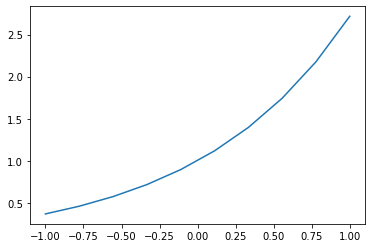

In [14]:
plt.plot(x_data_uniform, exp_function(x_data_uniform))

In [15]:
def recursive_representation(x_train, guess_p=None, guess_m=None):
    x_train = np.vstack((x_train,x_train,x_train)).swapaxes(1,0)
    x_train[:, 1] = guess_p
    x_train[:, 2] = guess_m
    return x_train

In [16]:
delta = 0.05

In [17]:
x_data = recursive_representation(x_data_uniform, guess_p=np.mean(x_data_uniform), guess_m=np.mean(x_data_uniform))

In [18]:
y_pred, y_train_dp, y_train_dm = rkernel_training(x_train=x_data[:9], 
                                                    y_train=exp_function(x_data[:9, 0]), 
                                                    x_test=x_data, 
                                                    train_sigma=None, 
                                                    train_lambda=0,
                                                    delta=delta)

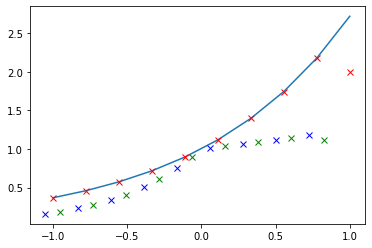

In [21]:
plt.plot(x_data_uniform, exp_function(x_data_uniform))
plt.plot(x_data_uniform, y_pred, 'rx')
plt.plot(x_data_uniform[:9]+delta, y_train_dp, 'gx')
plt.plot(x_data_uniform[:9]-delta, y_train_dm, 'bx')

ValueError: x and y must have same first dimension, but have shapes (10,) and (9,)

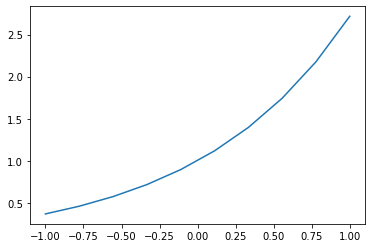

In [25]:
x_datar = recursive_representation(x_data_uniform[:9], guess_p=y_train_dp, guess_m=y_train_dm)
y_pred, y_train_dp, y_train_dm = rkernel_training(x_train=x_datar[:9], 
                y_train=exp_function(x_datar[:9, 0]), 
                x_test=x_datar, 
                train_sigma=None, 
                train_lambda=0,
                delta=delta)
plt.plot(x_data_uniform, exp_function(x_data_uniform))
plt.plot(x_data_uniform, y_pred, 'rx')
plt.plot(x_data_uniform[:9]+delta, y_train_dp, 'gx')
plt.plot(x_data_uniform[:9]-delta, y_train_dm, 'bx')

In [ ]:
x_datar = recursive_representation(x_data_uniform, guess_p=y_train_dp, guess_m=y_train_dm)
y_pred, y_train_dp, y_train_dm = rkernel_training(x_train=x_datar[:9], 
                y_train=exp_function(x_datar[:9, 0]), 
                x_test=x_datar, 
                train_sigma=None, 
                train_lambda=0,
                delta=delta)
plt.plot(x_data_uniform[:-8], exp_function(x_data_uniform)[:-8])
plt.plot(x_data_uniform, y_pred, 'rx')
plt.plot(x_data_uniform[:9]+delta, y_train_dp, 'gx')
plt.plot(x_data_uniform[:9]-delta, y_train_dm, 'bx')